### Context: Predict next-day rain by training classification models on the target variable rain tomorrow.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('weatherAUS.csv', sep = ',')

In [3]:
# Checking to know what the data looks like.
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


In [4]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [5]:
df.tail()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No
145459,2017-06-25,Uluru,14.9,NaN,0.0,NaN,NaN,NaN,NaN,ESE,...,62.0,36.0,1020.2,1017.9,8.0,8.0,15.0,20.9,No,NaN


In [6]:
df[444:999]

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
444,2010-02-18,Albury,NaN,31.2,NaN,NaN,NaN,ESE,31.0,SSE,...,33.0,24.0,1020.4,1019.1,NaN,NaN,21.0,30.0,NaN,No
445,2010-02-19,Albury,16.4,30.3,0.0,NaN,NaN,NNE,26.0,E,...,54.0,34.0,1023.6,1019.6,NaN,NaN,20.8,29.2,No,No
446,2010-02-20,Albury,15.7,31.8,0.0,NaN,NaN,NW,57.0,SE,...,70.0,35.0,1018.9,1014.3,1.0,2.0,19.6,30.9,No,No
447,2010-02-21,Albury,19.6,34.7,0.6,NaN,NaN,SSW,59.0,SE,...,71.0,59.0,1015.3,1011.2,3.0,8.0,23.8,27.3,No,Yes
448,2010-02-22,Albury,20.2,26.4,3.6,NaN,NaN,E,46.0,ENE,...,83.0,70.0,1014.6,1011.9,8.0,8.0,21.3,24.2,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,2011-09-21,Albury,1.7,18.2,3.6,NaN,NaN,W,30.0,NaN,...,99.0,53.0,1022.6,1020.3,8.0,5.0,7.8,18.0,Yes,No
995,2011-09-22,Albury,4.4,22.1,0.0,NaN,NaN,ENE,30.0,E,...,81.0,36.0,1023.4,1017.4,NaN,NaN,12.6,21.9,No,No
996,2011-09-23,Albury,10.0,18.4,0.0,NaN,NaN,W,35.0,W,...,65.0,39.0,1017.9,1018.1,NaN,NaN,14.5,17.8,No,No
997,2011-09-24,Albury,1.9,18.3,0.0,NaN,NaN,SE,37.0,ESE,...,69.0,39.0,1020.3,1016.3,NaN,NaN,11.8,17.9,No,No


In [7]:
df.Location

0         Albury
1         Albury
2         Albury
3         Albury
4         Albury
           ...  
145455     Uluru
145456     Uluru
145457     Uluru
145458     Uluru
145459     Uluru
Name: Location, Length: 145460, dtype: object

In [8]:
df.Location.nunique()

49

In [9]:
df.Location.unique()

array(['Albury', 'BadgerysCreek', 'Cobar', 'CoffsHarbour', 'Moree',
       'Newcastle', 'NorahHead', 'NorfolkIsland', 'Penrith', 'Richmond',
       'Sydney', 'SydneyAirport', 'WaggaWagga', 'Williamtown',
       'Wollongong', 'Canberra', 'Tuggeranong', 'MountGinini', 'Ballarat',
       'Bendigo', 'Sale', 'MelbourneAirport', 'Melbourne', 'Mildura',
       'Nhil', 'Portland', 'Watsonia', 'Dartmoor', 'Brisbane', 'Cairns',
       'GoldCoast', 'Townsville', 'Adelaide', 'MountGambier', 'Nuriootpa',
       'Woomera', 'Albany', 'Witchcliffe', 'PearceRAAF', 'PerthAirport',
       'Perth', 'SalmonGums', 'Walpole', 'Hobart', 'Launceston',
       'AliceSprings', 'Darwin', 'Katherine', 'Uluru'], dtype=object)

In [10]:
df.RainTomorrow

0          No
1          No
2          No
3          No
4          No
         ... 
145455     No
145456     No
145457     No
145458     No
145459    NaN
Name: RainTomorrow, Length: 145460, dtype: object

In [11]:
df.RainTomorrow.unique()

array(['No', 'Yes', nan], dtype=object)

In [12]:
df.shape

(145460, 23)

In [13]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [14]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


In [15]:
df.describe(include = 'object')

,Date,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
count,145460,145460,135134,134894,141232,142199,142193
unique,3436,49,16,16,16,2,2
top,2013-11-12,Canberra,W,N,SE,No,No
freq,49,3436,9915,11758,10838,110319,110316


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [17]:
# Some columns have a lot of null values for that reason columns with a lot of null values  and columns not needed are to be dropped.
df.isnull().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

In [18]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [19]:
# Columns with a lot of null values and columns that seems not to be needed are dropped and reassigned to the variable df
df = df.drop(['Evaporation', 'Sunshine', 'Cloud9am', 'Cloud3pm', 'Location', 'Date'], axis = 1)
df.head()

,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,13.4,22.9,0.6,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,No,No
1,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,No,No
2,12.9,25.7,0.0,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,No,No
3,9.2,28.0,0.0,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,No,No
4,17.5,32.3,1.0,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,No,No


In [20]:
# Checking the shape of the dataframe
df.shape

(145460, 17)

In [21]:
# Dropping any rolls with null values and reassigning the change to the variable df
# Checking the shape of the entire dataframe
df = df.dropna(axis = 0)
df.shape

(112925, 17)

In [22]:
# N/B: The dependent variable is RainTomorrow 
df.columns

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'WindGustDir', 'WindGustSpeed',
       'WindDir9am', 'WindDir3pm', 'WindSpeed9am', 'WindSpeed3pm',
       'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [23]:
# Changing columns with string values to numerical values cause strings can't be used to train a model.
# Columns with strings; Rain Tomorrow, WindGustDir, WindDir9am, WIndDir3am, and Rain Today
# This conversion is done so they can be fed into machine learning algorithms.
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['WindGustDir'] = le.fit_transform(df['WindGustDir'])
df['WindDir9am'] = le.fit_transform(df['WindDir9am'])
df['WindDir3pm'] = le.fit_transform(df['WindDir3pm'])
df['RainToday'] = le.fit_transform(df['RainToday'])
df['RainTomorrow'] = le.fit_transform(df['RainTomorrow'])

In [24]:
# Checking if the conversion was encoded
df.head()
# It shows that they strings are now converted into numeric data

,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,13.4,22.9,0.6,13,44.0,13,14,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,0,0
1,7.4,25.1,0.0,14,44.0,6,15,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,0,0
2,12.9,25.7,0.0,15,46.0,13,15,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,0,0
3,9.2,28.0,0.0,4,24.0,9,0,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,0,0
4,17.5,32.3,1.0,13,41.0,1,7,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,0,0


In [25]:
# Dividing the Raintomorrow column into dependent and independent (to be used for training and training of models)
# Assinging the column, RainTomorrow to a new variable y which is to be predicted
# Then, dropping Raintomorrom column and assigning the entire dataset where rain tomorrow is dropped to the variable x
y = df['RainTomorrow']
x = df.drop(['RainTomorrow'], axis = 1)

Text(0.5, 1.0, 'Rain Tomorrow')

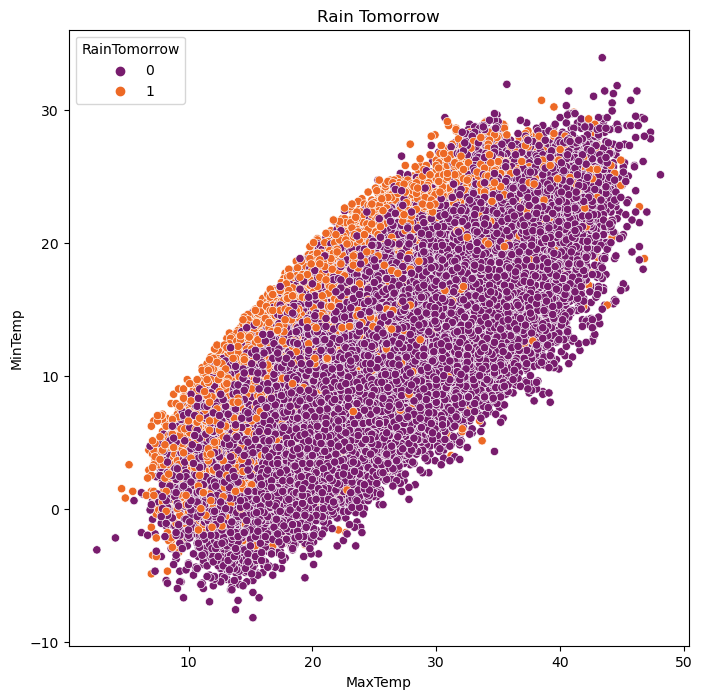

In [26]:
# There's a clutter and there is also a linear relationship existing btw the two variables
plt.figure(figsize = (8,8))
sns.scatterplot(x = 'MaxTemp', y = 'MinTemp', hue = 'RainTomorrow', palette = 'inferno', data = df)
plt.title('Rain Tomorrow')

<Axes: xlabel='Humidity9am', ylabel='Temp9am'>

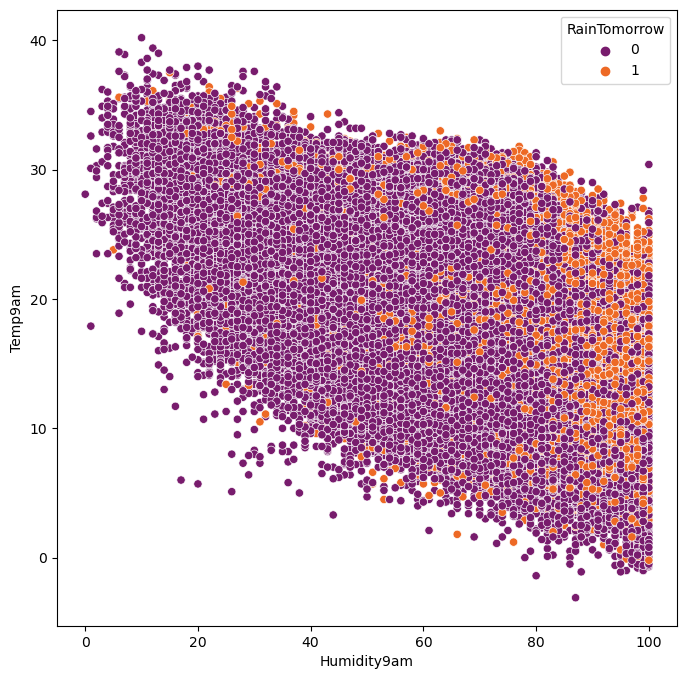

In [27]:
plt.figure(figsize = (8,8))
sns.scatterplot(x = 'Humidity9am', y = 'Temp9am', hue = 'RainTomorrow', palette = 'inferno', data = df)

The greater the humidity the greater the chance of rain tomorrow

# Heatmap
##### Using a heatmap to draw the correlation between every each column

<Axes: >

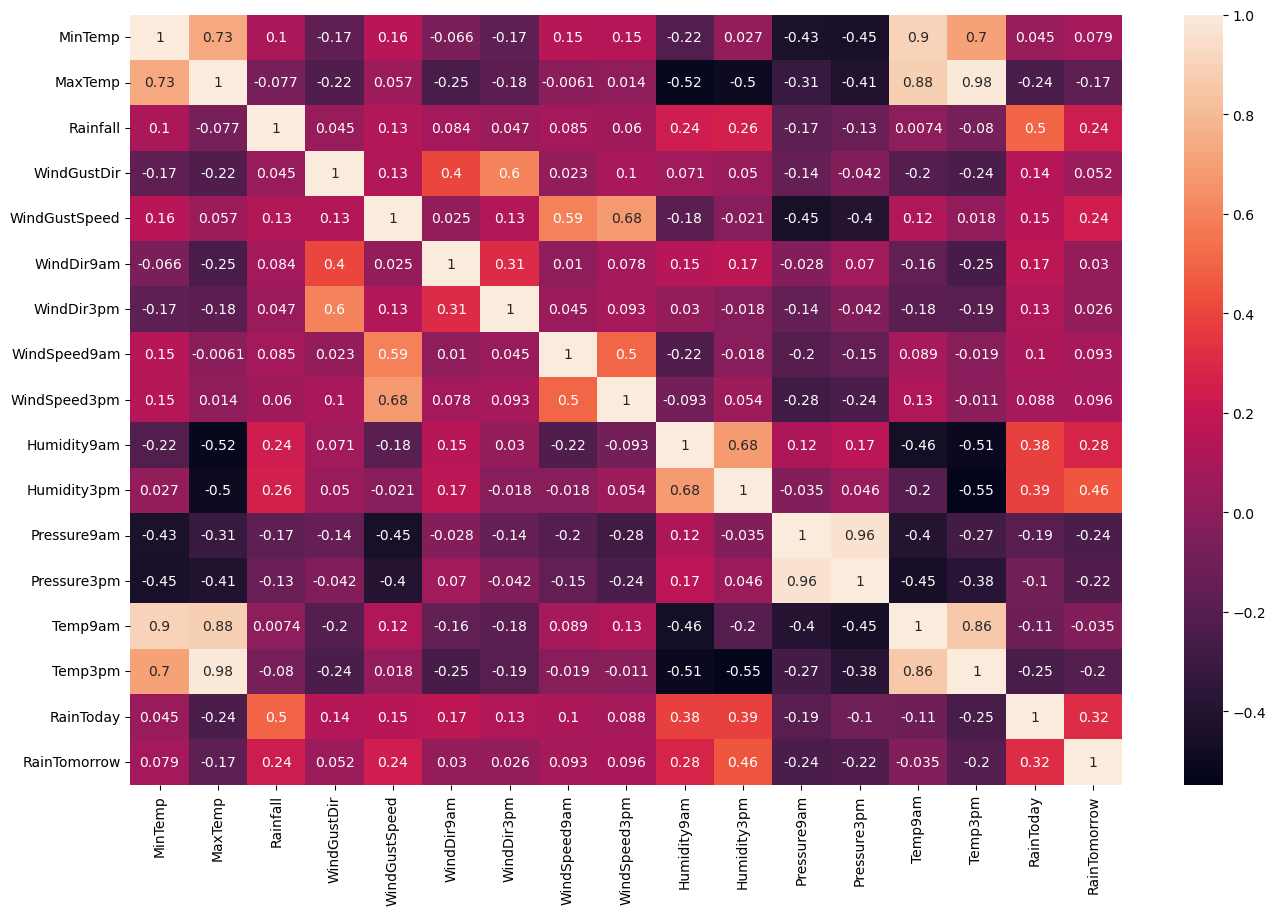

In [28]:
plt.figure(figsize = (16,10))
sns.heatmap(df.corr(), annot = True)

Rain tomorrow has a good relationship between humidity and rain today

In [29]:
# Training and testing the x and y features which were assigned above.
# N/B: The function(train_test_split) is to return four subsets; x_train, x_test, y_train, and y_test 
# Test_size = 0.2 means that 20% of the entire dataset should be tested and the remaining 80% should be trained.
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2)

By splitting the dataset into training and testing sets, one can access how well the model performs on the unseen data, which helps one to understand it's ability to generalize to new observation beyond the training data. 

In [30]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [31]:
x_test

,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday
138471,0.8,23.2,0.0,2,39.0,2,9,15.0,19.0,15.0,5.0,1024.3,1018.8,14.0,21.7,0
64090,12.4,22.4,0.0,0,50.0,11,2,9.0,24.0,63.0,45.0,1024.8,1026.1,16.6,21.2,0
103719,7.5,18.8,0.0,0,31.0,0,2,19.0,19.0,53.0,30.0,1035.7,1031.8,11.8,18.0,0
9314,8.5,26.2,0.0,5,35.0,7,5,7.0,19.0,35.0,52.0,1019.4,1017.2,23.3,24.2,0
90289,18.4,29.2,0.0,10,31.0,10,0,24.0,15.0,50.0,47.0,1019.4,1016.9,26.2,28.4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92175,10.5,22.2,0.0,11,22.0,7,5,11.0,15.0,62.0,44.0,1024.0,1021.4,15.5,21.9,0
140434,23.3,29.2,96.8,7,85.0,14,14,22.0,24.0,98.0,85.0,1005.8,1003.6,24.2,27.5,1
61612,17.5,21.5,18.8,9,37.0,9,10,7.0,13.0,94.0,97.0,1014.5,1010.4,19.3,20.0,1
90934,17.9,24.5,0.0,10,30.0,9,2,13.0,15.0,74.0,76.0,1019.2,1016.0,22.0,22.5,0


In [32]:
y_test

138471    0
64090     0
103719    0
9314      0
90289     0
         ..
92175     0
140434    1
61612     1
90934     0
19602     0
Name: RainTomorrow, Length: 22585, dtype: int32

In [33]:
x_train

,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday
35317,18.0,23.8,4.2,8,39.0,11,11,19.0,19.0,88.0,86.0,1020.3,1020.6,19.8,20.9,1
78113,2.9,16.9,0.2,11,20.0,1,12,4.0,13.0,99.0,59.0,1032.5,1029.0,5.6,16.3,0
104878,4.7,12.3,14.8,12,72.0,13,15,28.0,31.0,97.0,68.0,1009.4,1014.2,6.9,11.4,1
84744,12.6,21.2,0.4,10,28.0,12,9,7.0,13.0,74.0,51.0,1020.9,1017.9,15.5,20.2,0
12717,11.7,25.2,0.0,5,41.0,5,4,24.0,20.0,65.0,43.0,1021.8,1016.9,18.5,23.7,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66022,13.8,24.3,0.0,8,35.0,15,8,9.0,15.0,88.0,51.0,1021.8,1020.0,15.8,22.3,0
71355,9.4,20.2,0.0,15,48.0,15,13,24.0,30.0,56.0,22.0,1015.1,1015.7,13.4,18.6,0
36159,15.0,19.3,0.2,7,57.0,7,14,26.0,30.0,43.0,32.0,1002.9,1001.9,17.4,18.1,0
84983,22.6,25.0,23.4,10,17.0,10,10,2.0,9.0,91.0,87.0,1011.8,1009.0,23.1,24.1,1


In [34]:
y_test

138471    0
64090     0
103719    0
9314      0
90289     0
         ..
92175     0
140434    1
61612     1
90934     0
19602     0
Name: RainTomorrow, Length: 22585, dtype: int32

In [35]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train, y_train)
predictions = lr.predict(x_test)
print(predictions)

[0 0 0 ... 1 0 0]


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# Logistic Regression

In [36]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train, y_train)
predictions = lr.predict(x_test)
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))
print(accuracy_score(y_test, predictions))

[[16657   879]
 [ 2602  2447]]
              precision    recall  f1-score   support

           0       0.86      0.95      0.91     17536
           1       0.74      0.48      0.58      5049

    accuracy                           0.85     22585
   macro avg       0.80      0.72      0.74     22585
weighted avg       0.84      0.85      0.83     22585

0.8458711534204117


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# Decision Tree

In [37]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)
predictions = dt.predict(x_test)
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))
print(accuracy_score(y_test, predictions))

[[15103  2433]
 [ 2297  2752]]
              precision    recall  f1-score   support

           0       0.87      0.86      0.86     17536
           1       0.53      0.55      0.54      5049

    accuracy                           0.79     22585
   macro avg       0.70      0.70      0.70     22585
weighted avg       0.79      0.79      0.79     22585

0.7905689617002435


# Random Forest Classifier

In [39]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train, y_train)
predictions = rf.predict(x_test)
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))
print(accuracy_score(y_test, predictions))

[[16732   804]
 [ 2442  2607]]
              precision    recall  f1-score   support

           0       0.87      0.95      0.91     17536
           1       0.76      0.52      0.62      5049

    accuracy                           0.86     22585
   macro avg       0.82      0.74      0.76     22585
weighted avg       0.85      0.86      0.85     22585

0.8562762895727253


In [40]:
%pip install xgboost

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.



In [43]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize XGBoost classifier
xgb_clf = xgb.XGBClassifier()

# Fit the classifier to the training data
xgb_clf.fit(x_train, y_train)

# Make predictions on the test data
pred = xgb_clf.predict(x_test)

# Calculate and print accuracy, F1-score, and confusion matrix
print('Accuracy:', accuracy_score(y_test, pred))
print('F1 Score:', classification_report(y_test, pred))
print('Confusion Matrix:', confusion_matrix(y_test, pred))

Accuracy: 0.8551693601948196
F1 Score:               precision    recall  f1-score   support

           0       0.88      0.94      0.91     17536
           1       0.74      0.55      0.63      5049

    accuracy                           0.86     22585
   macro avg       0.81      0.75      0.77     22585
weighted avg       0.85      0.86      0.85     22585

Confusion Matrix: [[16553   983]
 [ 2288  2761]]
